In [1]:
import os
import random
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Picking a Random Folder

In [44]:
# create a list of availble folders in the data
# and pick a random folder
folder = random.choice([name for name in os.listdir('Data_MIT/')])
folder

'01331'

## Reading the JSON Files

In [45]:
# name and path of the data folder on my system
path = 'Data_MIT/' + folder

# Face Crop
with open(path + '/appleFace.json', 'r') as file:
    face = json.load(file)
    
# Left Eye
with open(path + '/appleLeftEye.json', 'r') as file:
    eye_l = json.load(file)

# Right Eye
with open(path + '/appleRightEye.json', 'r') as file:
    eye_r = json.load(file)

# Face Grid
with open(path + '/faceGrid.json', 'r') as file:
    grid = json.load(file)
    
# Info
with open(path + '/info.json', 'r') as file:
    info = json.load(file)

# dot
with open(path + '/dotInfo.json', 'r') as file:
    dot = json.load(file)


## Picking a Random File

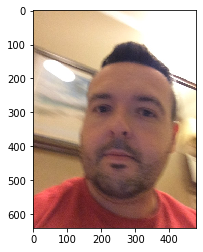

In [46]:
# make a list of indices of the invalid Frames in the Folder
# a frame could be invalid because of the face not being in the frame
# (not detected) or because of the left eye not being in the frame,
# or the right eye
# if all of these three values are valid, the frame's grid is valid
indices = [i for i, x in enumerate(face['IsValid']) if x == 0]
indices += [i for i, x in enumerate(eye_l['IsValid']) if x == 0]
indices += [i for i, x in enumerate(eye_r['IsValid']) if x == 0]
indices += [i for i, x in enumerate(grid['IsValid']) if x == 0]

# so instead of the next line, I could easily check on the gird validity
# But I prefer not to trust when I can double check
indices = list(set(indices))

# read and make list of all files in the folder
path = 'Data_MIT/' + folder + '/frames/'
files = [name for name in os.listdir(path)]

# keep picking a random file as long as its index in the
# invalid indices list
idx = indices[0]
while idx in indices:
    file = random.choice(files)
    idx = files.index(file)

# plot the frame    
img = cv2.cvtColor(cv2.imread(path + files[idx]), cv2.COLOR_BGR2RGB)
# plt.axis('off')
plt.imshow(img);

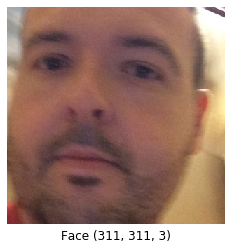

In [47]:
# Test if the face bounding box falls out of the frame

try:    
    # read the position of the top-left corner of the bounding box of the face (X,Y)
    # and the its height (H) and width (W), and plot the face patch
    crop = img[round(face['Y'][idx]):round(face['Y'][idx])+round(face['H'][idx]),
               round(face['X'][idx]):round(face['X'][idx])+round(face['W'][idx])]

    # print out the face patch dimensions
    txt = 'Face ' + str(crop.shape)

    # plot the face patch
    plt.axis('off')
    plt.title(txt, y=-.1)
    plt.imshow(crop);

except:
    print('Face''s bounding box falls out.')

## Plots

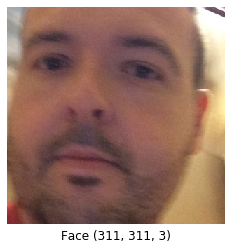

In [48]:
# first we have to check to make sure the stupid face bounding box
# didn't fall out of the frame
# X,Y is the coordinate of the top-left corner of the bounding box,
# so four offisde cases are possible:

# 1. X is negative
if round(face['X'][idx]) < 0:
    # so we fill the shortage by replicating the edge 
    img = cv2.copyMakeBorder(img, 0, 0, np.abs(round(face['X'][idx])), 0, cv2.BORDER_REPLICATE)
    # and reset the X value regarding the new frame
    face['X'][idx] = 0
    print('Negative X\n')

# 2. Y is negative
if round(face['Y'][idx]) < 0:
    # so we fill the shortage by replicating the edge 
    img = cv2.copyMakeBorder(img, np.abs(round(face['Y'][idx])), 0, 0, 0, cv2.BORDER_REPLICATE)
    # and reset the Y value regarding the new frame
    face['Y'][idx] = 0
    print('Negative Y\n')

# 3. X+W is larger than the frame width
if round(face['X'][idx])+round(face['W'][idx]) > img.shape[1]:
    # so we fill the shortage (diff) by replicating the edge
    diff = np.abs(img.shape[1]-(round(face['X'][idx])+round(face['W'][idx])))
    img = cv2.copyMakeBorder(img, 0, 0, 0, diff, cv2.BORDER_REPLICATE)
    print('Face box out of the right border\n')

# 4. Y+H is larger than the frame height
if round(face['Y'][idx])+round(face['H'][idx]) > img.shape[0]:
    # so we fill the shortage (diff) by replicating the edge
    diff = np.abs(img.shape[0]-(round(face['Y'][idx])+round(face['H'][idx])))
    img = cv2.copyMakeBorder(img, 0, diff, 0, 0, 0, cv2.BORDER_REPLICATE)
    print('Face box out of the lower border\n')


# read the position of the top-left corner of the bounding box of the face (X,Y)
# and the its height (H) and width (W), and plot the face patch
crop = img[round(face['Y'][idx]):round(face['Y'][idx])+round(face['H'][idx]),
           round(face['X'][idx]):round(face['X'][idx])+round(face['W'][idx])]

# print out the face patch dimensions
txt = 'Face ' + str(crop.shape)

# plot the face patch
plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(crop);

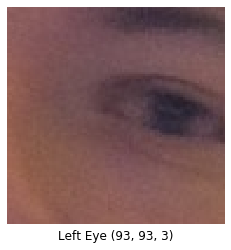

In [49]:
# read the position of the top-left corner of the bounding box of the left eye (X,Y)
# and the its height (H) and width (W), and plot the left eye patch
eyel = crop[round(eye_l['Y'][idx]):round(eye_l['Y'][idx])+round(eye_l['H'][idx]),
            round(eye_l['X'][idx]):round(eye_l['X'][idx])+round(eye_l['W'][idx])]

# print out the left eye patch dimensions
txt = 'Left Eye ' + str(eyel.shape)

# plot the left eye patch
plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(eyel);

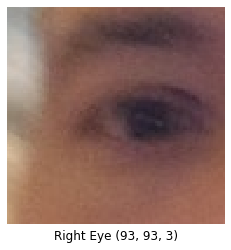

In [50]:
# read the position of the top-left corner of the bounding box of the right eye (X,Y)
# and the its height (H) and width (W), and plot the right eye patch
eyer = crop[round(eye_r['Y'][idx]):round(eye_r['Y'][idx])+round(eye_r['H'][idx]),
            round(eye_r['X'][idx]):round(eye_r['X'][idx])+round(eye_r['W'][idx])]

# print out the right eye patch dimensions
txt = 'Right Eye ' + str(eyer.shape)

# plot the right eye patch
plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(eyer);

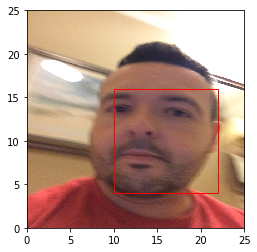

In [51]:
fig, ax = plt.subplots()


gridf = patches.Rectangle((round(grid['X'][idx]),25-round(grid['Y'][idx])-round(grid['H'][idx])),
                           round(grid['W'][idx]),round(grid['H'][idx]),
                          linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(gridf)
# ax.axis('off')
# plt.title('Face Grid', y=-.1)

ax.imshow(img, extent=[0,25,0,25]);

## The Frame

In [34]:
path[9:] + files[idx]

'01581/frames/00072.jpg'

## Info

In [55]:
info

{'TotalFrames': 2013,
 'NumFaceDetections': 1657,
 'NumEyeDetections': 757,
 'Dataset': 'train',
 'DeviceName': 'iPhone 5S'}